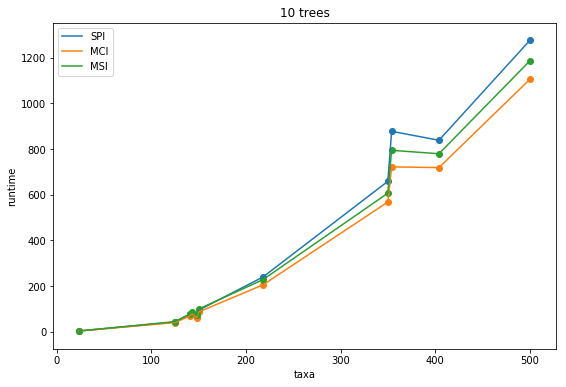

In [36]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_df = pd.read_csv('../benchmark/common_matrix.csv', delim_whitespace=True, header=None)
#values[10][24]['MSI']
values = {}
for row in csv_df.iterrows():
    instance_name = row[1][0]
    trees = 10
    taxa = int(instance_name.split('/')[1])
    metric = row[1][1]
    #mode = row[1][2]
    runtime = float(row[1][3])
    if not (trees in values):
        values[trees] = {}
    if not (metric in values[trees]):
        values[trees][metric] = {}
    values[trees][metric][taxa] = runtime;
#print(values)

#separate set of plots for different tree set sizes
plt.rcParams["figure.figsize"] = (9, 6)
for trees in values:
    plt.title(str(trees) + ' trees')
    plt.xlabel('taxa')
    plt.ylabel('runtime')
    #separate line per metric
    for metric, results in values[trees].items():
        x_values = [taxa for taxa, runtime in results.items()]
        y_values = [runtime for taxa, runtime in results.items()]
        sort_index = np.argsort(x_values)
        x_values = [x_values[sort_index[i]] for i in range(len(sort_index))]
        y_values = [y_values[sort_index[i]] for i in range(len(sort_index))]
        plt.plot(x_values ,y_values, label = metric)
        plt.scatter(x_values, y_values)
    plt.legend()
    plt.savefig('output/metric_runtimes_' + str(trees) + "_trees" )
    plt.show()
    
        